In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

# Display the first few rows
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check for missing values
missing_values = titanic_df.isnull().sum()
missing_values[missing_values > 0]


,0
Age,177
Cabin,687
Embarked,2


In [ ]:
# Fill missing values in 'Age' with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode (most common value)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)


In [ ]:
# Check data types
titanic_df.info()

# Convert categorical columns to 'category' data type
categorical_columns = ['Sex', 'Embarked', 'Pclass']
titanic_df[categorical_columns] = titanic_df[categorical_columns].astype('category')

# Encode categorical variables
titanic_df = pd.get_dummies(titanic_df, drop_first=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


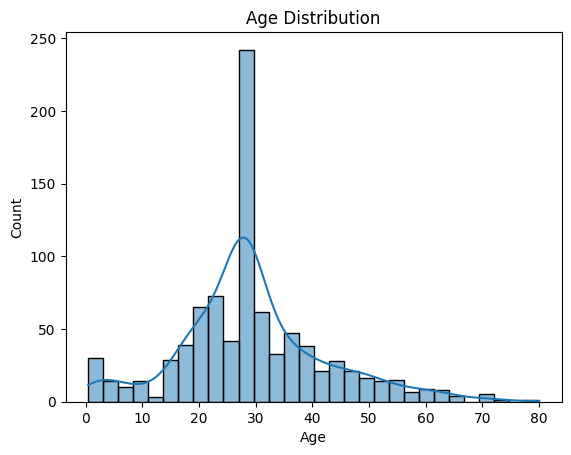

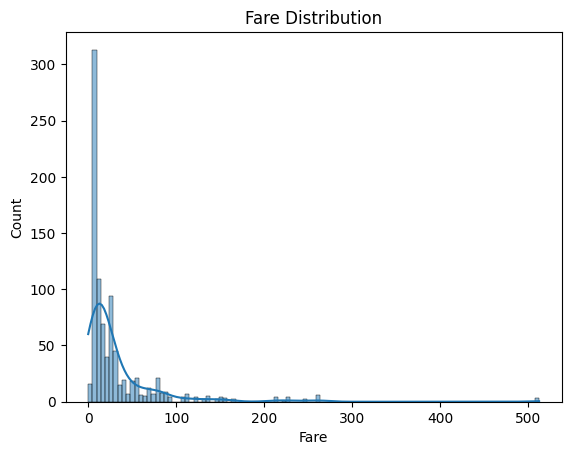

In [ ]:
# Distribution of 'Age'
sns.histplot(titanic_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Distribution of 'Fare'
sns.histplot(titanic_df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


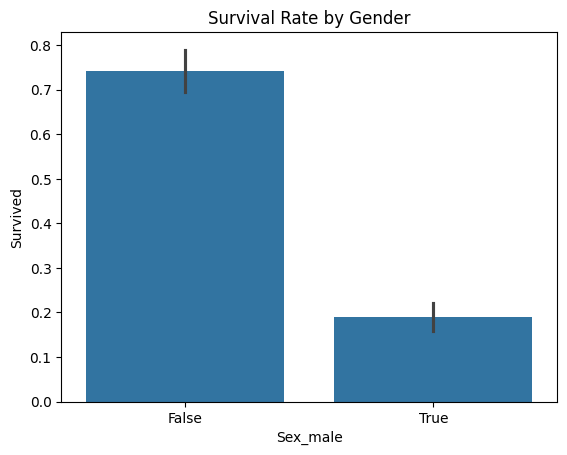

In [ ]:
# Survival rate by gender
sns.barplot(x='Sex_male', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()


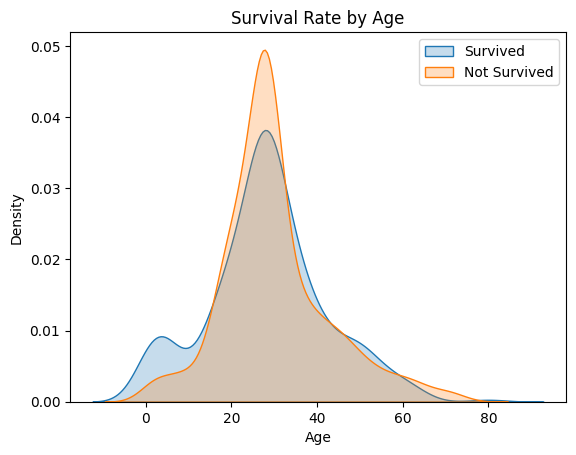

In [ ]:
# Survival rate by age
sns.kdeplot(titanic_df[titanic_df['Survived'] == 1]['Age'], fill=True, label='Survived')
sns.kdeplot(titanic_df[titanic_df['Survived'] == 0]['Age'], fill=True, label='Not Survived')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()



In [ ]:
# Correlation matrix
corr_matrix = titanic_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
